# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, we will focus on data visualization. The dataset will be provided through an RDBMS, and we will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, we will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [4]:
#we are going to access the file through url and download it later 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

**Install and Import Necessary Python Libraries**

Ensure that we have the required libraries installed to work with SQLite and Pandas:


In [ ]:
!pip install ipython-sql
!pip install seaborn
!pip install pandas
!pip install ipython-sql prettytable

In [38]:
import csv, sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prettytable
import numpy as np

In [9]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [55]:
# Read the CSV file
df = pd.read_csv(url)
# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [56]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
#conn.close()


65437

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [14]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [15]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [16]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [17]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [18]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


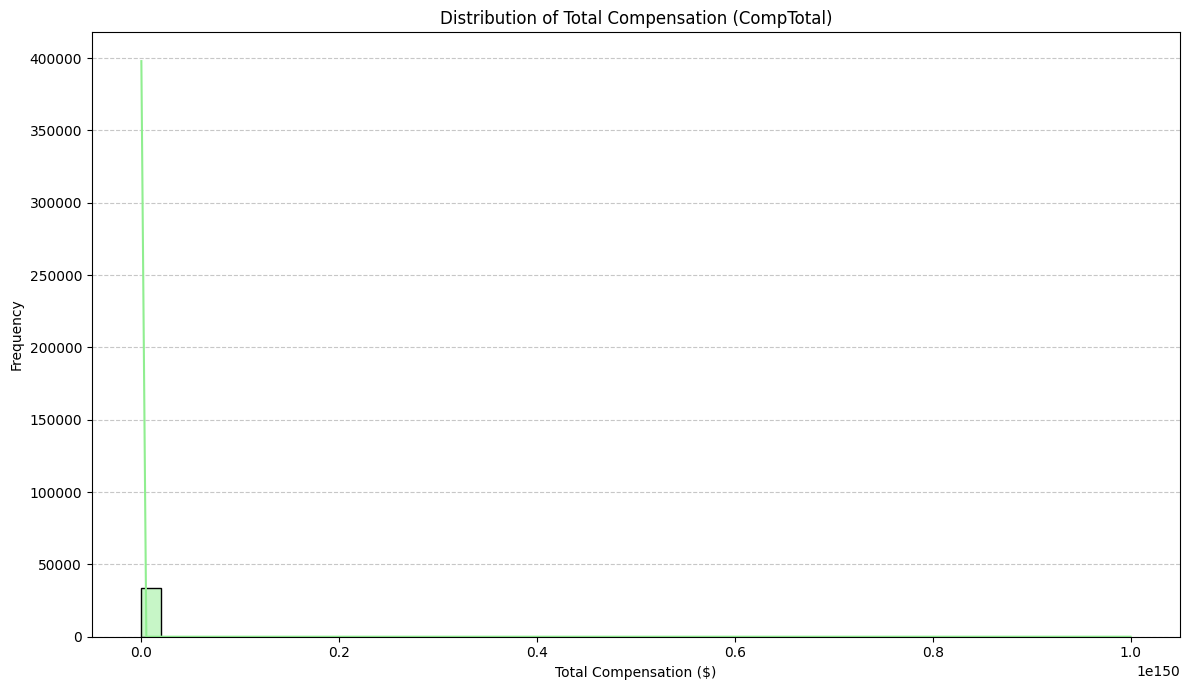

In [27]:
##
df = pd.read_sql_query("SELECT * From main", conn);
df['CompTotal_numeric'] = pd.to_numeric(df['CompTotal'], errors='coerce')
cleaned_comptotal = df['CompTotal_numeric'].dropna()
plt.figure(figsize=(12, 7))
sns.histplot(cleaned_comptotal, bins=50, kde=True, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Box Plots**

Plot a box plot of Age.


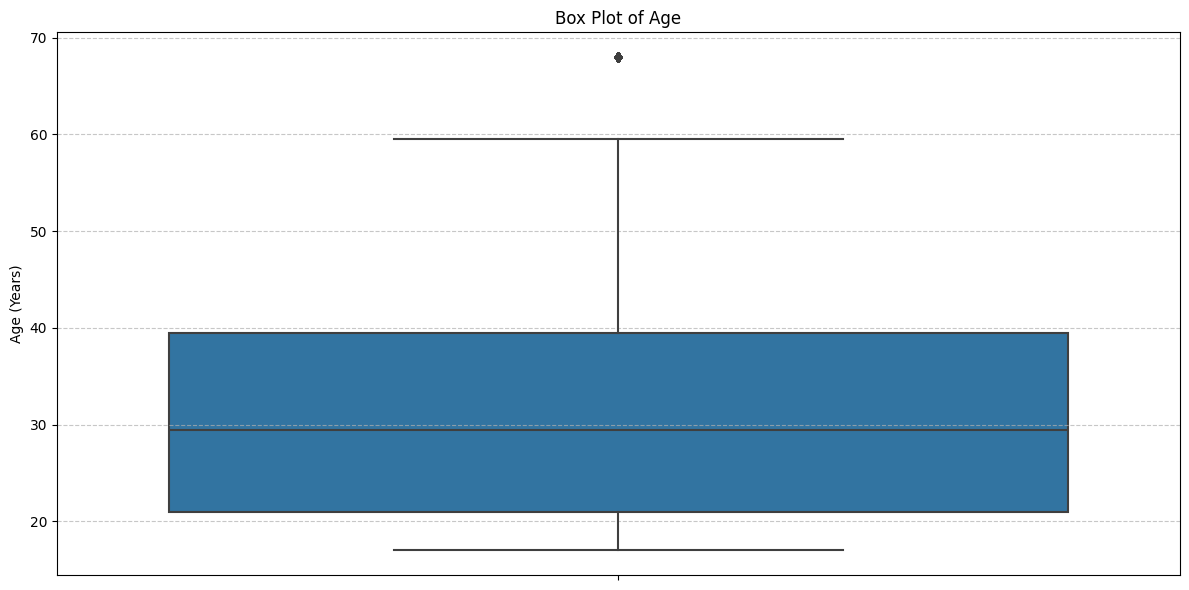

In [33]:
QUERY = """
SELECT *
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

#Mapping 'Age' to numeric values as it's categorical
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 68
}
df['Age_numeric'] = df['Age'].map(age_mapping) # Create a new numeric age column

# Use the newly created numeric age column and drop NaNs
cleaned_age = df['Age_numeric'].dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(y=cleaned_age)
plt.title('Box Plot of Age')
plt.ylabel('Age (Years)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


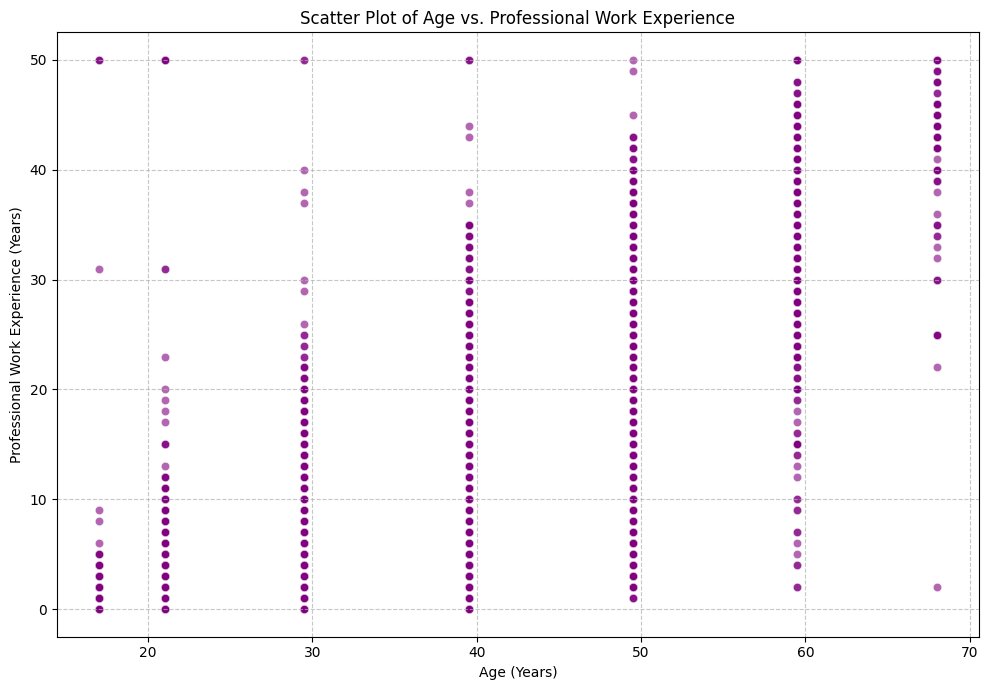

In [34]:
## Write your code here
QUERY = """
SELECT Age, WorkExp
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
age_mapping = {
            'Under 18 years old': 17,
            '18-24 years old': 21,
            '25-34 years old': 29.5,
            '35-44 years old': 39.5,
            '45-54 years old': 49.5,
            '55-64 years old': 59.5,
            '65 years or older': 68
        }
df['Age_numeric'] = df['Age'].map(age_mapping)

#Ensure 'WorkExp' is numeric.
df['WorkExp_numeric'] = pd.to_numeric(df['WorkExp'], errors='coerce')

# Drop rows where either 'Age_numeric' or 'WorkExp_numeric' is NaN
plot_df = df.dropna(subset=['Age_numeric', 'WorkExp_numeric']).copy()
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age_numeric', y='WorkExp_numeric', data=plot_df, alpha=0.6, color='purple')
plt.title('Scatter Plot of Age vs. Professional Work Experience')
plt.xlabel('Age (Years)')
plt.ylabel('Professional Work Experience (Years)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


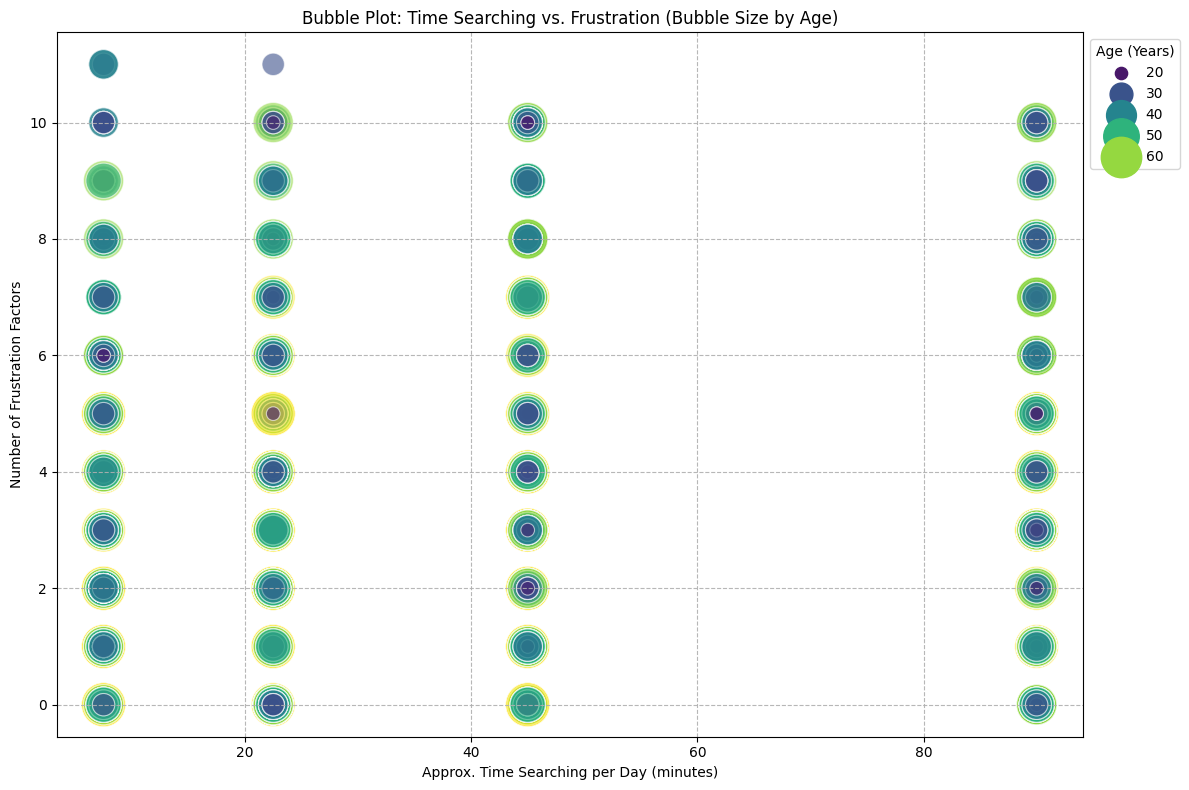

In [41]:
QUERY = """
SELECT Age, TimeSearching, Frustration
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
age_mapping = {
            'Under 18 years old': 17,
            '18-24 years old': 21,
            '25-34 years old': 29.5,
            '35-44 years old': 39.5,
            '45-54 years old': 49.5,
            '55-64 years old': 59.5,
            '65 years or older': 68
        }
df['Age_numeric'] = df['Age'].map(age_mapping)
time_searching_mapping = {
            'Less than 15 minutes a day': 7.5, # Midpoint
            '15-30 minutes a day': 22.5,
            '30-60 minutes a day': 45,
            '60-120 minutes a day': 90,
            'More than 120 minutes a day': 150 # Approximation
        }
# Apply mapping, converting any unmapped values (like 'NA') to NaN
df['TimeSearching_numeric'] = df['TimeSearching'].map(time_searching_mapping)
#Transform 'Frustration' to numeric (count of selected items).
# Fill 'NA' with empty string or 'None of these' for consistent splitting/counting.
df['Frustration_cleaned'] = df['Frustration'].fillna('')
# If 'None of these' is present, it should count as 0 frustrations.
df['Frustration_numeric'] = df['Frustration_cleaned'].apply(
            lambda x: 0 if x == 'None of these' else (len(x.split(';')) if x else np.nan)
        )

# Drop rows where any of the required numeric columns are NaN for plotting.
plot_df = df.dropna(subset=['Age_numeric', 'TimeSearching_numeric', 'Frustration_numeric']).copy()

# --- Plotting the Bubble Plot ---
plt.figure(figsize=(12, 8)) # Set the figure size
sns.scatterplot(
                x='TimeSearching_numeric',
                y='Frustration_numeric',
                size='Age_numeric', # Use Age_numeric for bubble size
                sizes=(20, 1000),   # Range of bubble sizes (min, max)
                data=plot_df,
                alpha=0.6,
                hue='Age_numeric',  # Color bubbles by age for better distinction
                palette='viridis',  # Color palette
                #legend='full'       # Show full legend for size and hue
            )

#Set plot title and labels
plt.legend(title='Age (Years)', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Bubble Plot: Time Searching vs. Frustration (Bubble Size by Age)')
plt.xlabel('Approx. Time Searching per Day (minutes)')
plt.ylabel('Number of Frustration Factors')
plt.grid(True, linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64


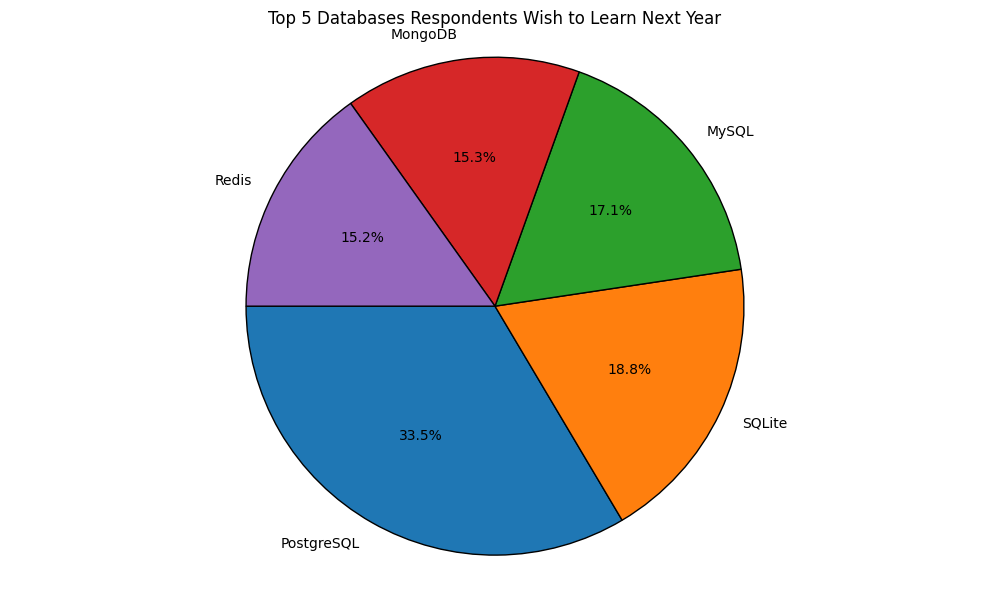

In [51]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
desired_databases = df['DatabaseWantToWorkWith'].fillna('').str.split(';').explode().str.strip()
desired_databases = desired_databases[desired_databases != ''] #this line of code exclude the empty or NaN values to get into top 5 if the null values has too much NaN values
database_counts = desired_databases.value_counts() #counting the no. of db
top_5_databases = database_counts.head(5)#selecting top 5 db
print(top_5_databases)
plt.figure(figsize=(10, 6)) # Set the figure size for a good-sized pie chart
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=180, 
        wedgeprops={'edgecolor': 'black'})
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


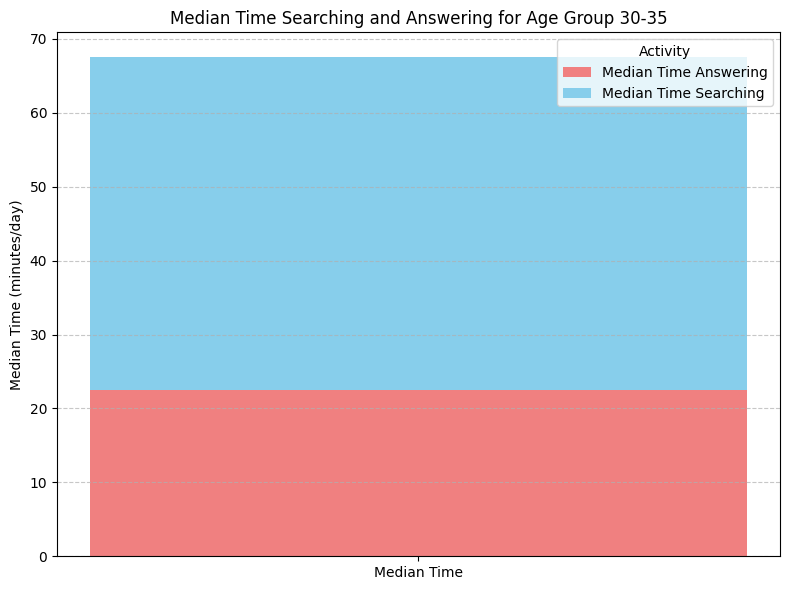

In [57]:
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
time_mapping = {
            'Less than 15 minutes a day': 7.5,
            '15-30 minutes a day': 22.5,
            '30-60 minutes a day': 45,
            '60-120 minutes a day': 90,
            'More than 120 minutes a day': 150
        }
 # Apply mapping to 'TimeSearching' and 'TimeAnswering' columns
df['TimeSearching_numeric'] = df['TimeSearching'].map(time_mapping)
df['TimeAnswering_numeric'] = df['TimeAnswering'].map(time_mapping)
age_group_df = df[df['Age'].isin(['25-34 years old', '35-44 years old'])].copy()

median_time_searching = age_group_df['TimeSearching_numeric'].median()
median_time_answering = age_group_df['TimeAnswering_numeric'].median()
plot_data = pd.DataFrame({
    'Category': ['Median Time'],
    'Time Searching': [median_time_searching if not pd.isna(median_time_searching) else 0],
    'Time Answering': [median_time_answering if not pd.isna(median_time_answering) else 0]
})
plt.figure(figsize=(8, 6)) # Set the figure size for the plot
p1 = plt.bar(plot_data['Category'], plot_data['Time Answering'], color='lightcoral', label='Median Time Answering')
p2 = plt.bar(plot_data['Category'], plot_data['Time Searching'], bottom=plot_data['Time Answering'], color='skyblue', label='Median Time Searching')
plt.ylabel('Median Time (minutes/day)')
plt.title('Median Time Searching and Answering for Age Group 30-35')
plt.xticks(rotation=0) # No rotation needed for a single bar on x-axis
plt.legend(title='Activity') # Add a legend to distinguish the stacked parts
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for readability
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


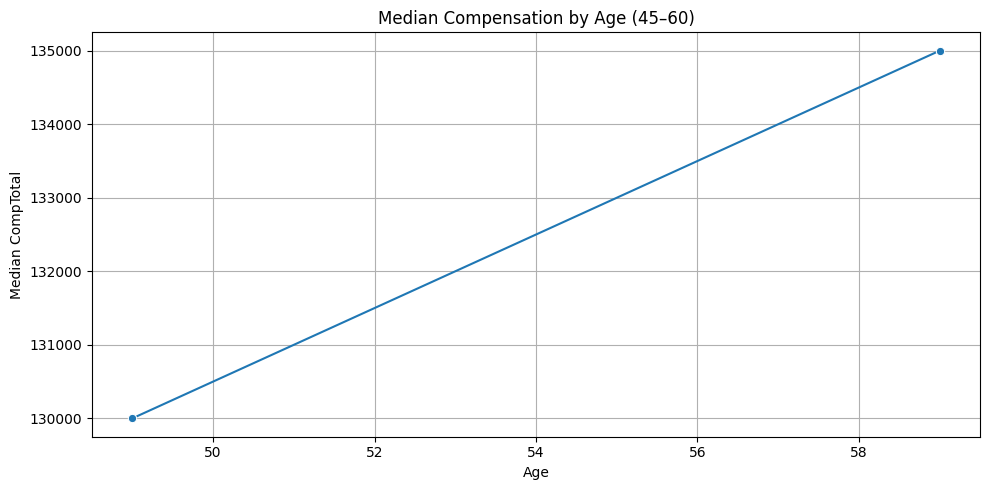

In [59]:
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
age_map = {
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 67,
    'Under 18 years old': 16
}
df['AgeNumeric'] = df['Age'].map(age_map)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
filtered_df = df.dropna(subset=['CompTotal', 'AgeNumeric'])
age_filtered_df = filtered_df[(filtered_df['AgeNumeric'] >= 45) & (filtered_df['AgeNumeric'] <= 60)]
median_comp_by_age = age_filtered_df.groupby('AgeNumeric')['CompTotal'].median().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=median_comp_by_age, x='AgeNumeric', y='CompTotal', marker='o')
plt.title('Median Compensation by Age (45–60)')
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.grid(True)
plt.tight_layout()
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


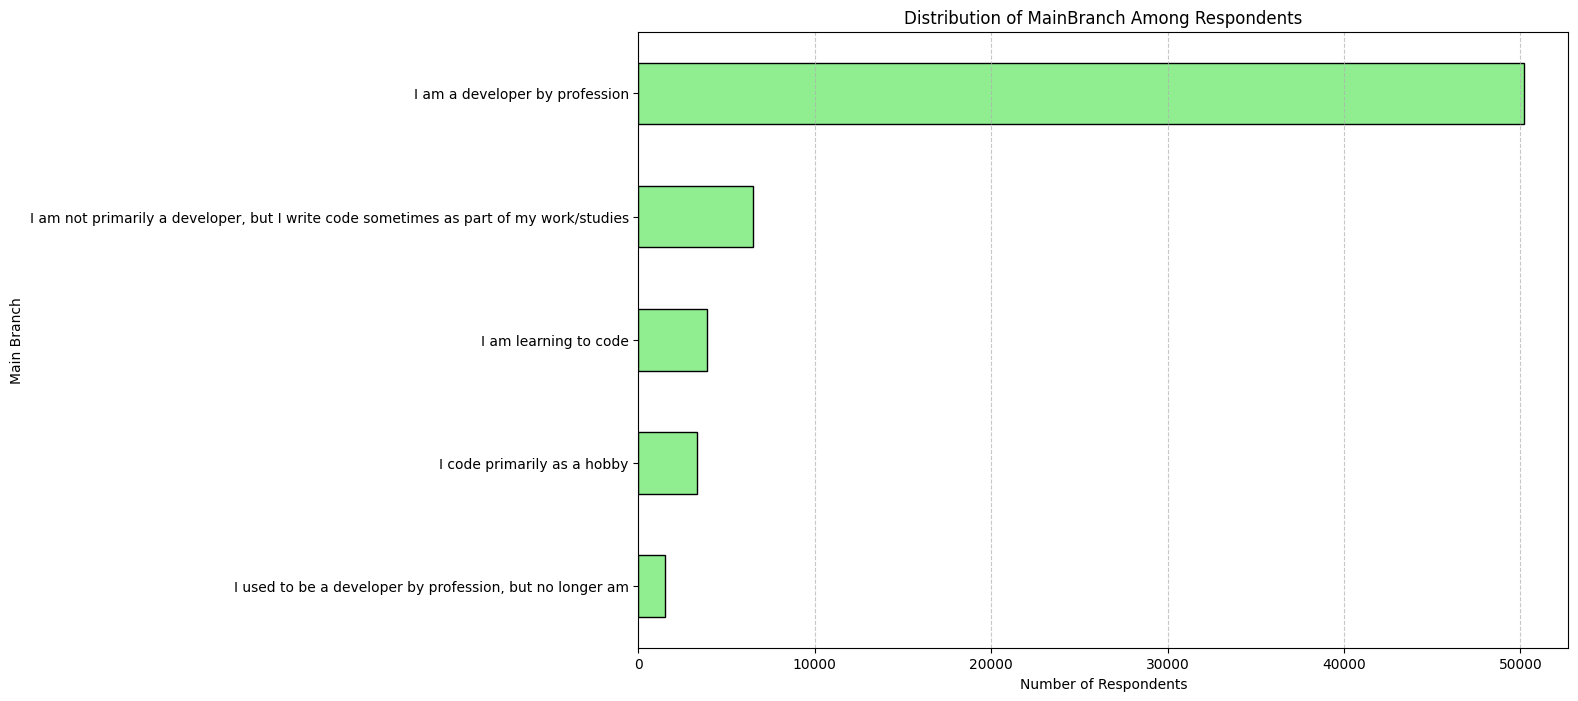

In [61]:
QUERY = """
SELECT MainBranch
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
main_branch_counts = df['MainBranch'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(12, 8)) # Set the figure size for better readability
main_branch_counts.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Distribution of MainBranch Among Respondents')
plt.xlabel('Number of Respondents') # X-axis is count for horizontal bars
plt.ylabel('Main Branch') # Y-axis is the category
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Summary


In this lab, we focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. we applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [62]:
conn.close()

### This Lab is done by Bimal Upadhaya © 2025.
